<a href="https://colab.research.google.com/github/Kadeian/reimagined-octo-disco/blob/master/Plant_Seedlings_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computer Vision: Plant Seedlings Classification

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term.



The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.**



The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Loading the dataset

In [ ]:
# Uncomment and run the below code if you are using google colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

# Load the images and labels
images = np.load('/content/drive/MyDrive/Colab Notebooks/images.npy')
labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Labels.csv')

# Display the shapes of the loaded data
print(f'Images shape: {images.shape}')
print(f'Labels shape: {labels.shape}')

# Display the first few rows of the labels to understand its structure
print(labels.head())


Images shape: (4750, 128, 128, 3)
Labels shape: (4750, 1)
                       Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill


## Data Overview

### Understand the shape of the dataset

In [ ]:
# Display the shape of the images and labels
print(f'Number of images: {images.shape[0]}')
print(f'Image dimensions: {images.shape[1]}x{images.shape[2]}')
print(f'Number of channels: {images.shape[3]}')
print(f'Number of labels: {labels.shape[0]}')

# Display the unique classes in the dataset
unique_labels = labels['Label'].unique()
print(f'Unique classes: {unique_labels}')
print(f'Number of unique classes: {len(unique_labels)}')


Number of images: 4750
Image dimensions: 128x128
Number of channels: 3
Number of labels: 4750
Unique classes: ['Small-flowered Cranesbill' 'Fat Hen' 'Shepherds Purse' 'Common wheat'
 'Common Chickweed' 'Charlock' 'Cleavers' 'Scentless Mayweed' 'Sugar beet'
 'Maize' 'Black-grass' 'Loose Silky-bent']
Number of unique classes: 12


## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

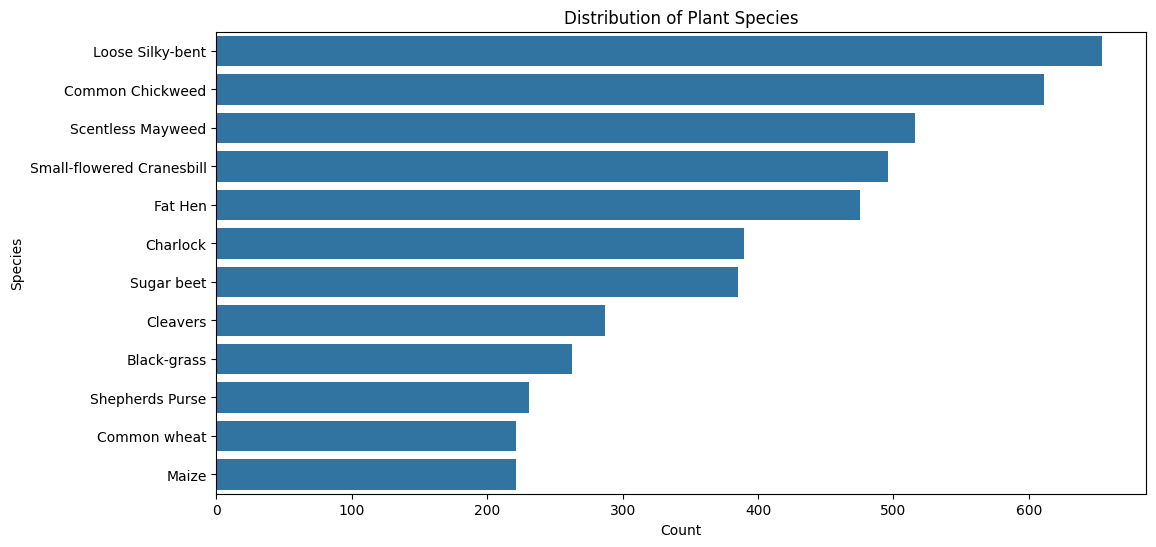

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of plant species
plt.figure(figsize=(12, 6))
sns.countplot(y=labels['Label'], order=labels['Label'].value_counts().index)
plt.title('Distribution of Plant Species')
plt.xlabel('Count')
plt.ylabel('Species')
plt.show()

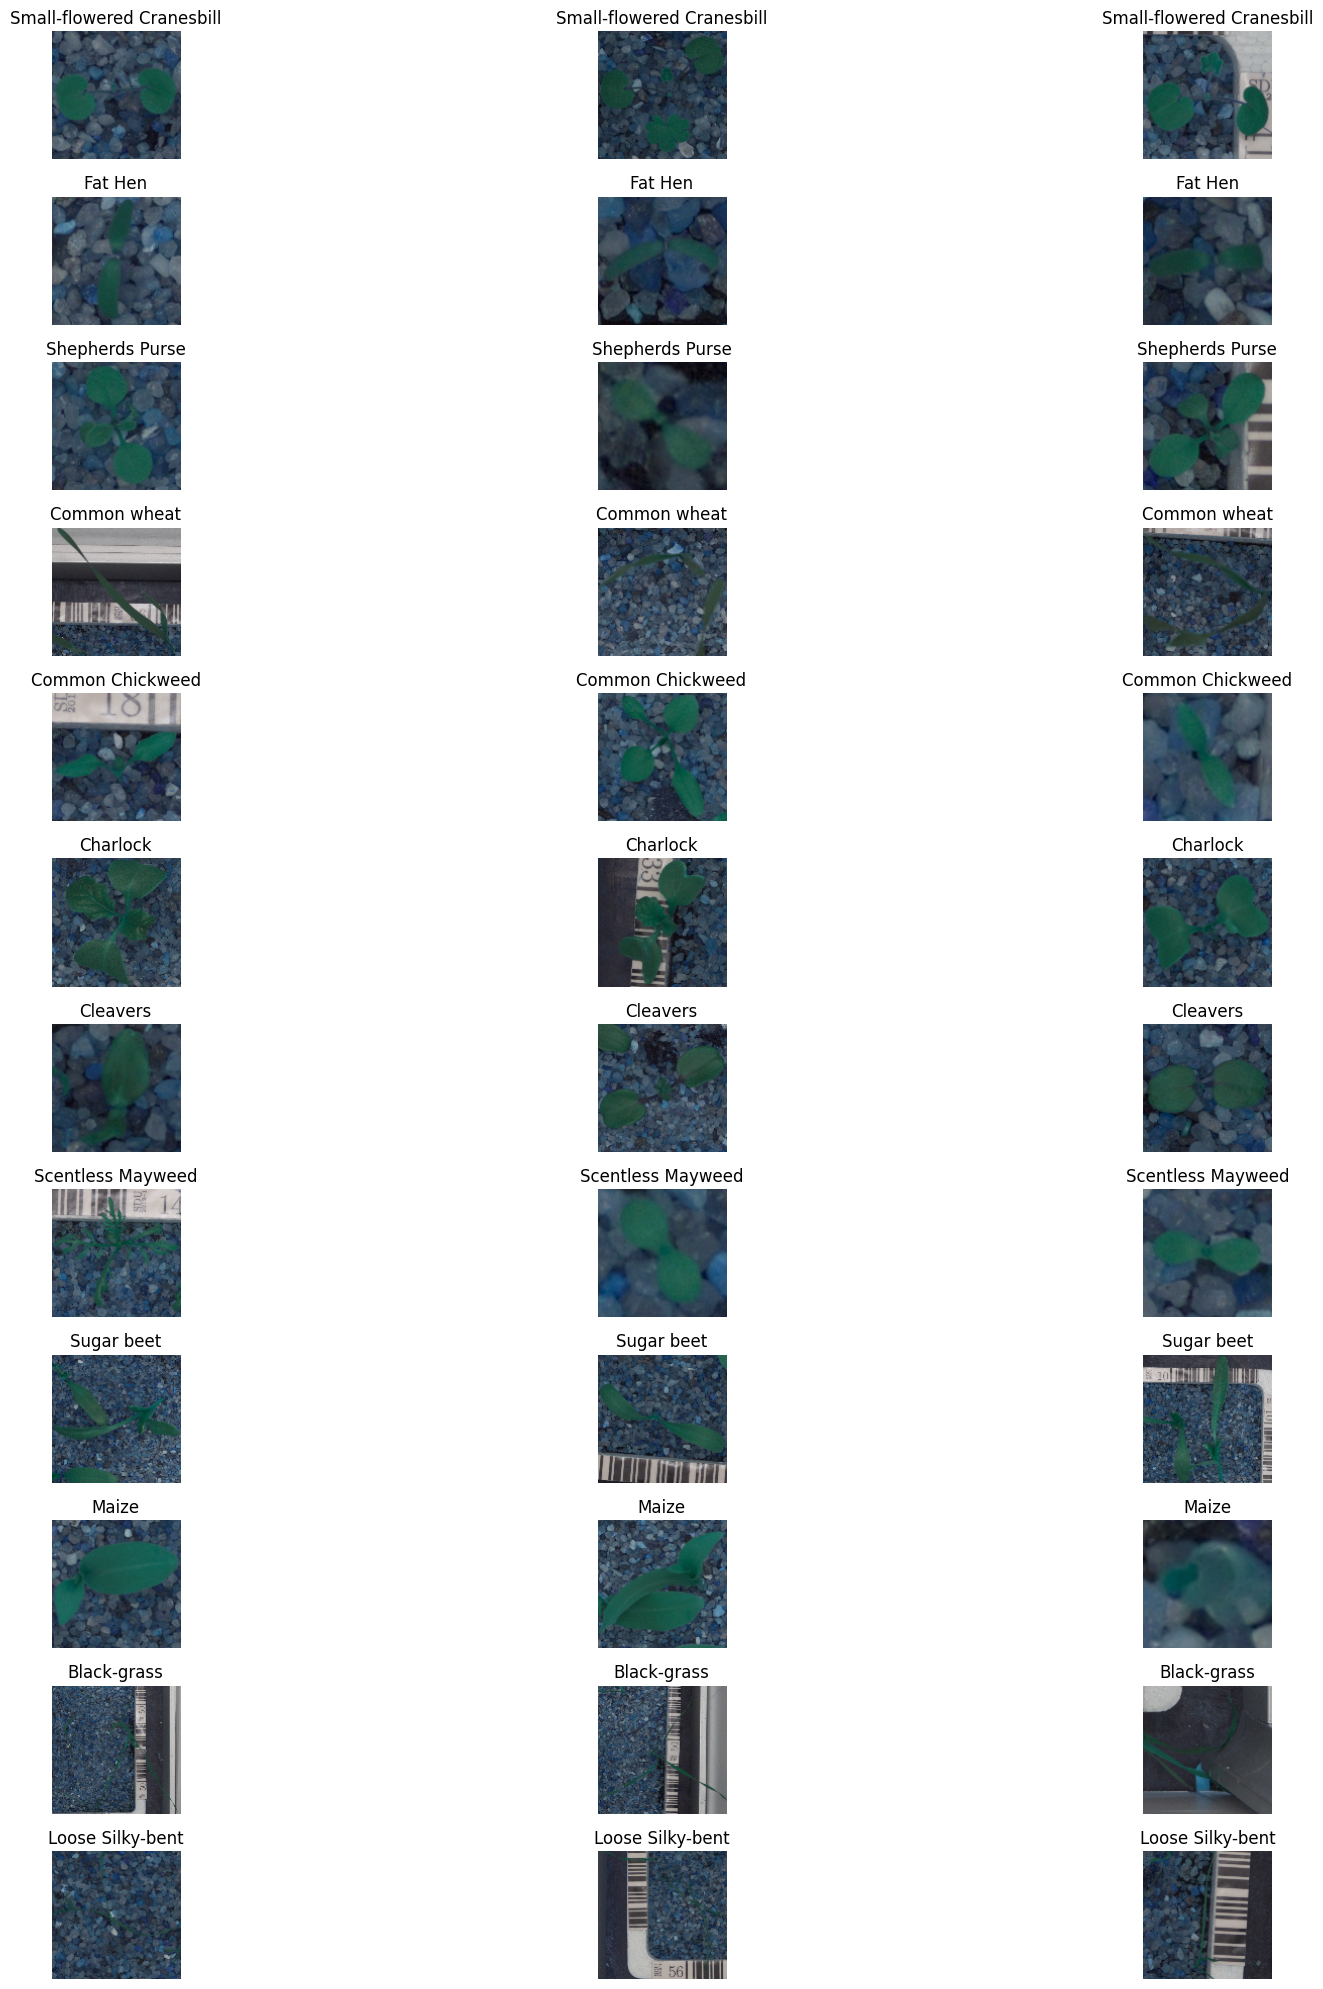

In [ ]:
import matplotlib.pyplot as plt

# Function to plot images from each category
def plot_sample_images(images, labels, categories, samples_per_category=3):
    plt.figure(figsize=(20, 20))
    for i, category in enumerate(categories):
        category_indices = labels.index[labels['Label'] == category].tolist()
        for j in range(samples_per_category):
            plt.subplot(len(categories), samples_per_category, i * samples_per_category + j + 1)
            plt.imshow(images[category_indices[j]])
            plt.title(category)
            plt.axis('off')
    plt.tight_layout()
    plt.show()

# Get unique categories
unique_categories = labels['Label'].unique()

# Plot sample images
plot_sample_images(images, labels, unique_categories, samples_per_category=3)



## Data Pre-Processing

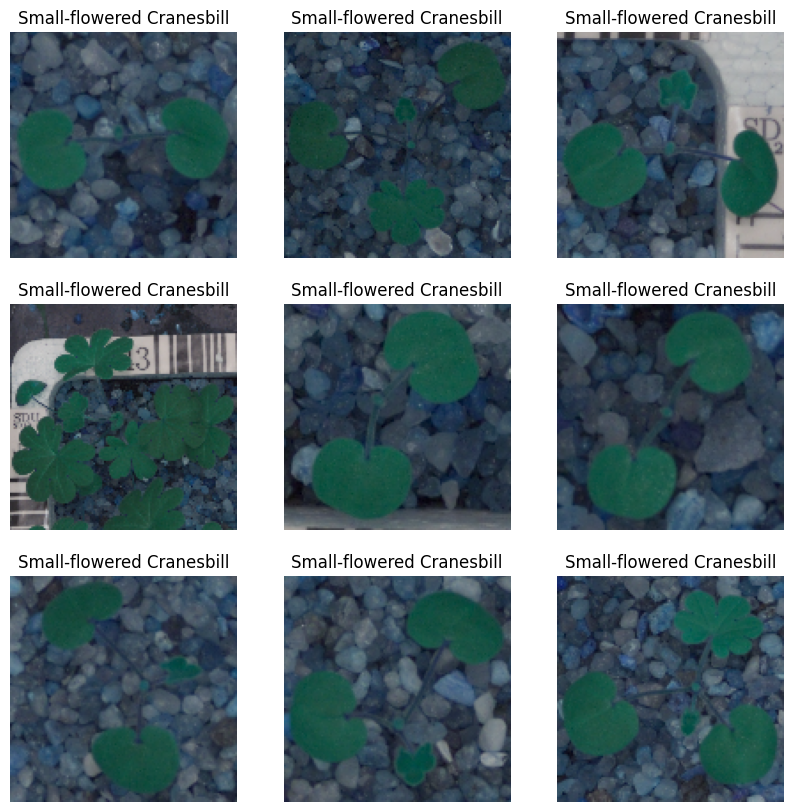

In [ ]:
# Plot sample images before conversion to RGB
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(labels['Label'][i])
    plt.axis('off')
plt.show()


### Convert the BGR images to RGB images.

In [ ]:
import cv2
import numpy as np

# Convert BGR images to RGB
images_rgb = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in images])

# Display the shapes of the processed images
print(f'Original images shape: {images.shape}')
print(f'RGB images shape: {images_rgb.shape}')


Original images shape: (4750, 128, 128, 3)
RGB images shape: (4750, 128, 128, 3)


### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
# Resize images from 128x128 to 64x64
images_resized = np.array([cv2.resize(image, (64, 64)) for image in images_rgb])

# Display the shape of the resized images
print(f'Resized images shape: {images_resized.shape}')


Resized images shape: (4750, 64, 64, 3)


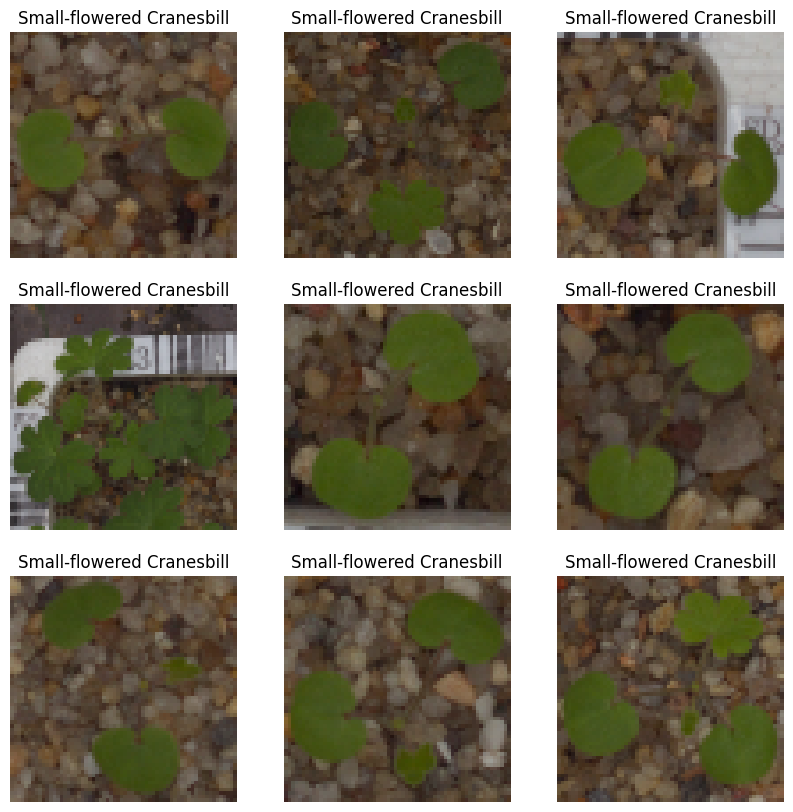

In [ ]:
# Plot sample images after conversion to RGB and resizing
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images_resized[i])
    plt.title(labels['Label'][i])
    plt.axis('off')
plt.show()


### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images_resized, labels['Label'], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the shapes of the splits
print(f'Train set shape: {X_train.shape}, {y_train.shape}')
print(f'Validation set shape: {X_val.shape}, {y_val.shape}')
print(f'Test set shape: {X_test.shape}, {y_test.shape}')



Train set shape: (3325, 64, 64, 3), (3325,)
Validation set shape: (712, 64, 64, 3), (712,)
Test set shape: (713, 64, 64, 3), (713,)


### Encode the target labels

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the target labels for training, validation, and test sets
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Display the first few encoded labels for training set
print(y_train_encoded[:10])




[ 2  9  8  3 11  8 10  8  3 10]


### Data Normalization

In [ ]:
# Normalize the pixel values to the range [0, 1]
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Display a sample of the normalized pixel values
print(f'Sample pixel values (train): {X_train[0][0][:5]}')


Sample pixel values (train): [[0.5254902  0.51764706 0.54901961]
 [0.77254902 0.78039216 0.80784314]
 [0.83529412 0.83137255 0.8627451 ]
 [0.85882353 0.85882353 0.88235294]
 [0.86666667 0.8627451  0.89019608]]


## Model Building

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Building the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(12, activation='softmax')  # 12 classes for 12 plant species
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

23/23 [==============================] - 0s 9ms/step
                           precision    recall  f1-score   support

              Black-grass       0.29      0.13      0.18        39
                 Charlock       0.86      0.90      0.88        68
                 Cleavers       0.85      0.80      0.83        41
         Common Chickweed       0.83      0.93      0.88        91
             Common wheat       0.92      0.76      0.83        29
                  Fat Hen       0.70      0.58      0.63        66
         Loose Silky-bent       0.70      0.76      0.73        96
                    Maize       0.86      0.67      0.75        27
        Scentless Mayweed       0.55      0.80      0.65        79
          Shepherds Purse       0.72      0.38      0.50        34
Small-flowered Cranesbill       0.93      0.88      0.90        88
               Sugar beet       0.70      0.82      0.76        55

                 accuracy                           0.75       713
       

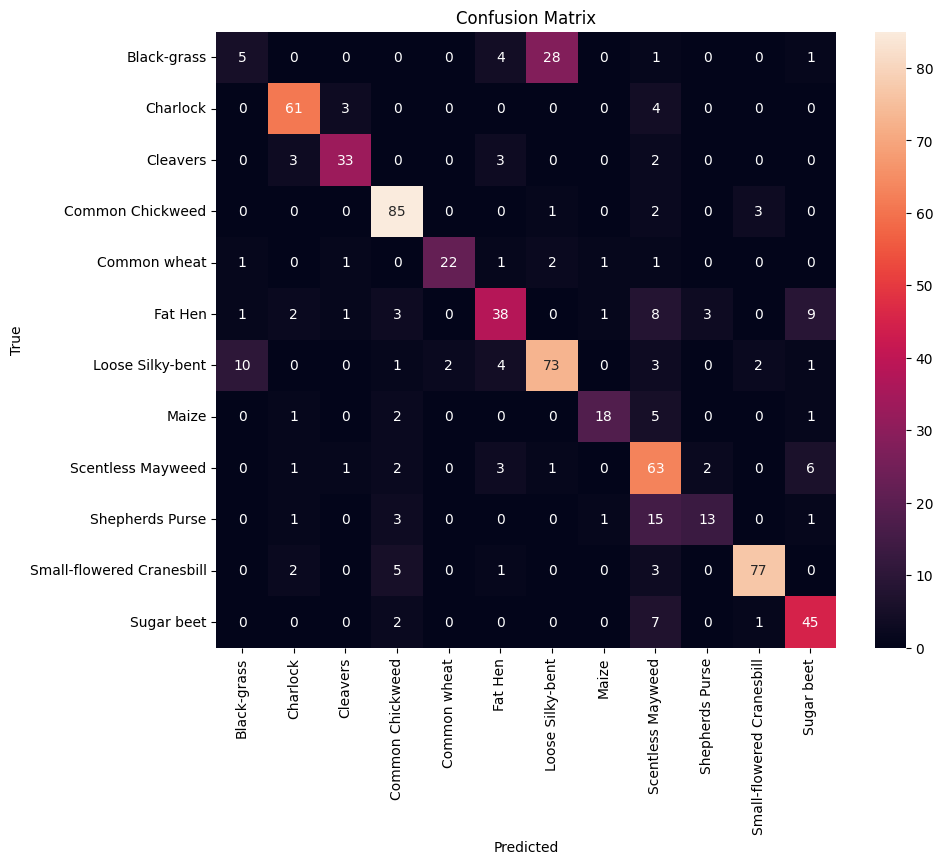

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print(classification_report(y_test_encoded, y_pred_classes, target_names=label_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Reduce the learning rate if the validation loss doesn't improve for 3 consecutive epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

# Add the callback to the list of callbacks
callbacks = [reduce_lr]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an image data generator with data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Fit the data generator to the training data
datagen.fit(X_train)


In [ ]:
# Training the model with data augmentation and learning rate reduction
history = model.fit(datagen.flow(X_train, y_train_encoded, batch_size=32),
                    epochs=25,
                    validation_data=(X_val, y_val_encoded),
                    callbacks=callbacks)


Epoch 1/25
104/104 [==============================] - 20s 91ms/step - loss: 2.3442 - accuracy: 0.1874 - val_loss: 1.9895 - val_accuracy: 0.2935 - lr: 0.0010
Epoch 2/25
104/104 [==============================] - 9s 88ms/step - loss: 2.0142 - accuracy: 0.2959 - val_loss: 1.6209 - val_accuracy: 0.4424 - lr: 0.0010
Epoch 3/25
104/104 [==============================] - 9s 82ms/step - loss: 1.7416 - accuracy: 0.3913 - val_loss: 1.4129 - val_accuracy: 0.5126 - lr: 0.0010
Epoch 4/25
104/104 [==============================] - 9s 88ms/step - loss: 1.6406 - accuracy: 0.4259 - val_loss: 1.3526 - val_accuracy: 0.5393 - lr: 0.0010
Epoch 5/25
104/104 [==============================] - 8s 79ms/step - loss: 1.5372 - accuracy: 0.4550 - val_loss: 1.2446 - val_accuracy: 0.5772 - lr: 0.0010
Epoch 6/25
104/104 [==============================] - 9s 88ms/step - loss: 1.4720 - accuracy: 0.4908 - val_loss: 1.2154 - val_accuracy: 0.5801 - lr: 0.0010
Epoch 7/25
104/104 [==============================] - 9s 83ms/s

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test accuracy: {test_accuracy:.4f}')


23/23 [==============================] - 0s 11ms/step - loss: 0.7500 - accuracy: 0.7475
Test accuracy: 0.7475


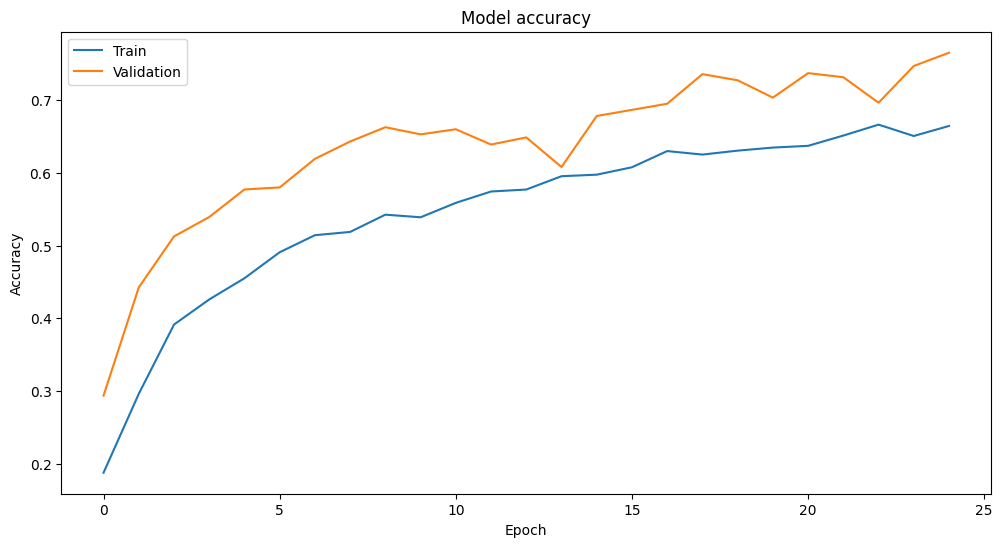

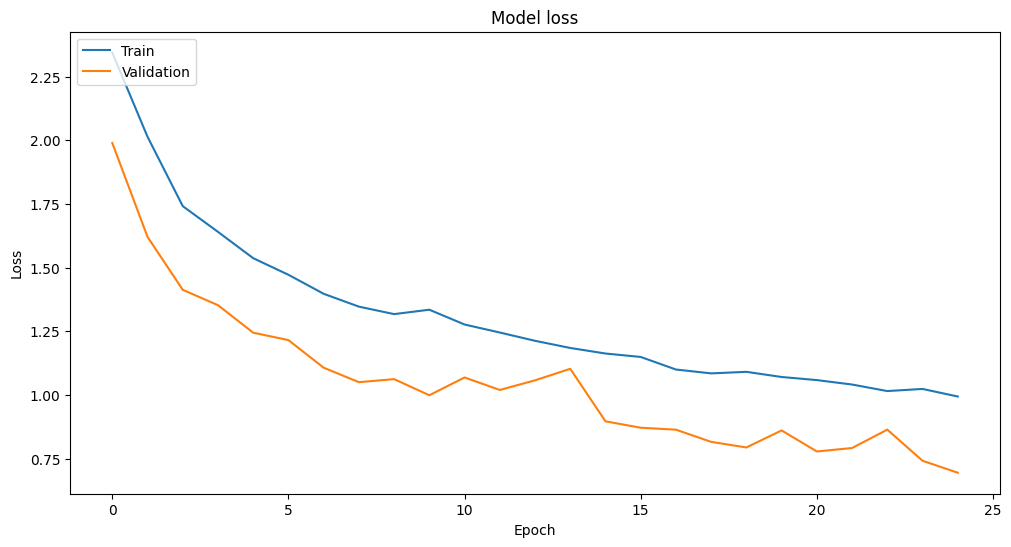

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Save the model
model.save('plant_seedlings_cnn_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


23/23 [==============================] - 0s 6ms/step
                           precision    recall  f1-score   support

              Black-grass       0.29      0.13      0.18        39
                 Charlock       0.86      0.90      0.88        68
                 Cleavers       0.85      0.80      0.83        41
         Common Chickweed       0.83      0.93      0.88        91
             Common wheat       0.92      0.76      0.83        29
                  Fat Hen       0.70      0.58      0.63        66
         Loose Silky-bent       0.70      0.76      0.73        96
                    Maize       0.86      0.67      0.75        27
        Scentless Mayweed       0.55      0.80      0.65        79
          Shepherds Purse       0.72      0.38      0.50        34
Small-flowered Cranesbill       0.93      0.88      0.90        88
               Sugar beet       0.70      0.82      0.76        55

                 accuracy                           0.75       713
       

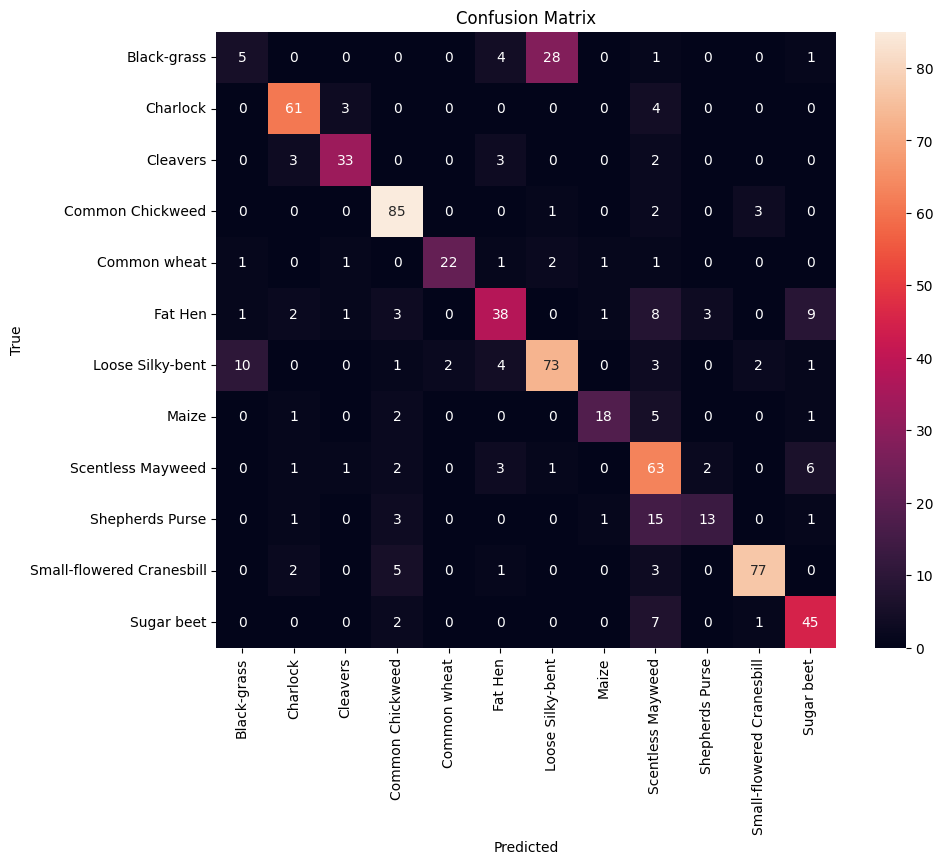

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print(classification_report(y_test_encoded, y_pred_classes, target_names=label_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


23/23 [==============================] - 0s 7ms/step
                           precision    recall  f1-score   support

              Black-grass       0.29      0.13      0.18        39
                 Charlock       0.86      0.90      0.88        68
                 Cleavers       0.85      0.80      0.83        41
         Common Chickweed       0.83      0.93      0.88        91
             Common wheat       0.92      0.76      0.83        29
                  Fat Hen       0.70      0.58      0.63        66
         Loose Silky-bent       0.70      0.76      0.73        96
                    Maize       0.86      0.67      0.75        27
        Scentless Mayweed       0.55      0.80      0.65        79
          Shepherds Purse       0.72      0.38      0.50        34
Small-flowered Cranesbill       0.93      0.88      0.90        88
               Sugar beet       0.70      0.82      0.76        55

                 accuracy                           0.75       713
       

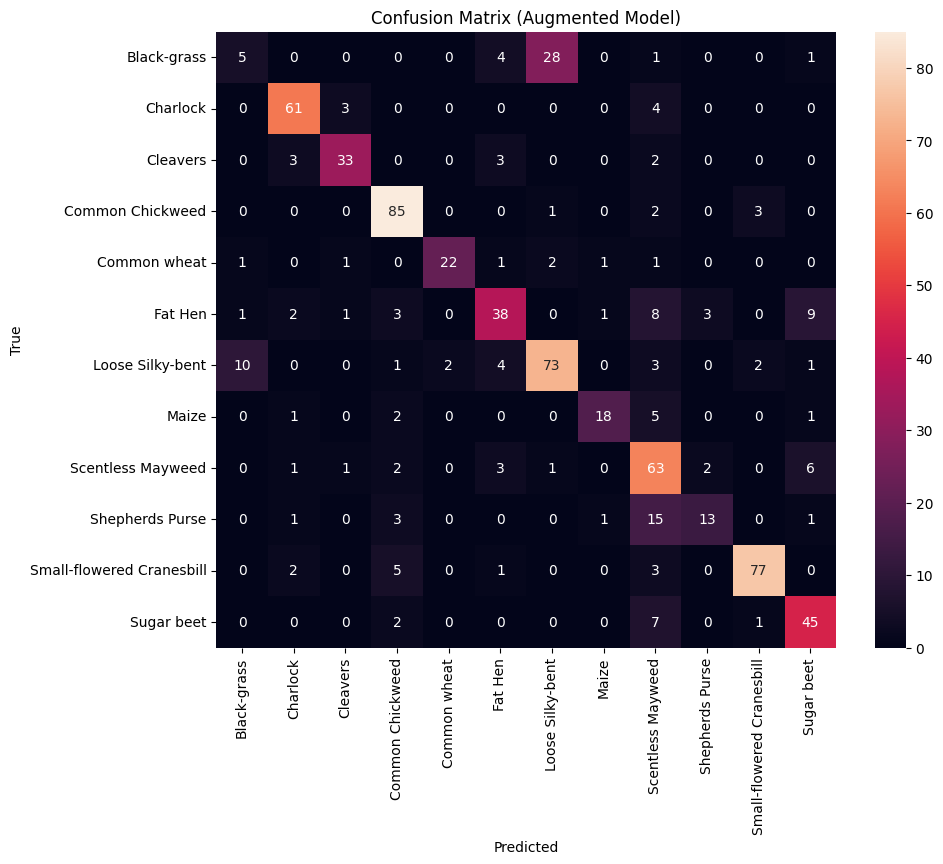

In [ ]:
# Predict on the test set for the model with data augmentation
y_pred_aug = model.predict(X_test)
y_pred_aug_classes = np.argmax(y_pred_aug, axis=1)

# Classification report for the augmented model
print(classification_report(y_test_encoded, y_pred_aug_classes, target_names=label_encoder.classes_))

# Confusion matrix for the augmented model
cm_aug = confusion_matrix(y_test_encoded, y_pred_aug_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_aug, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Augmented Model)')
plt.show()


1/1 [==============================] - 1s 588ms/step


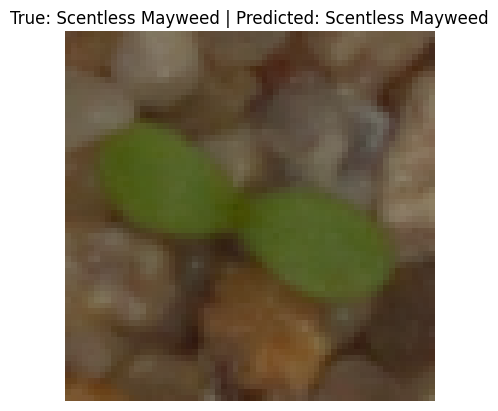

1/1 [==============================] - 0s 38ms/step


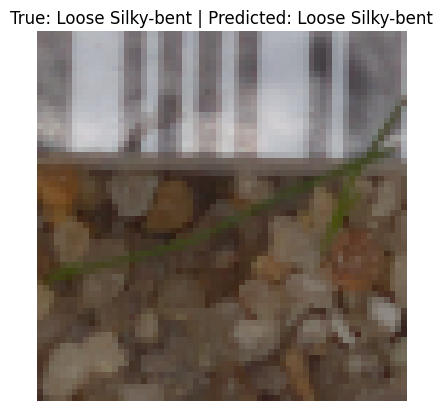

1/1 [==============================] - 0s 33ms/step


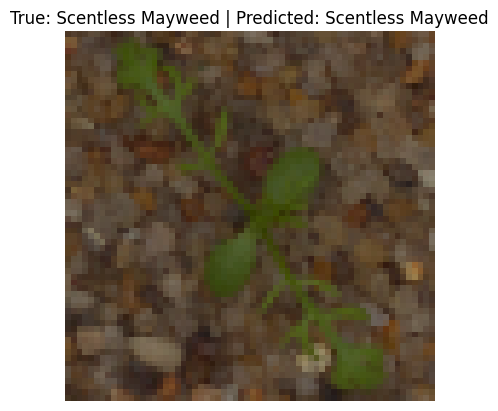

1/1 [==============================] - 0s 33ms/step


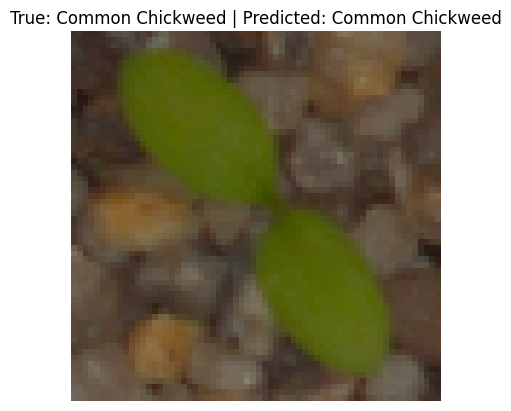

1/1 [==============================] - 0s 33ms/step


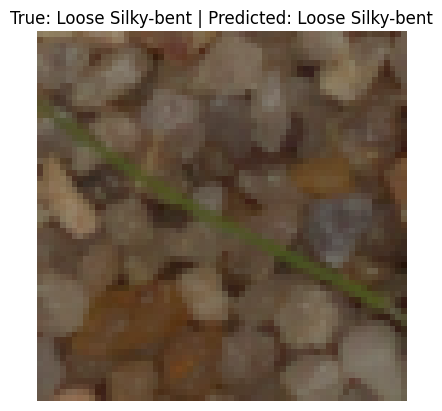

In [ ]:
import numpy as np

# Function to display an image along with its true and predicted labels
def display_prediction(index):
    img = X_test[index]
    true_label = label_encoder.inverse_transform([y_test_encoded[index]])[0]
    pred_label = label_encoder.inverse_transform([np.argmax(model.predict(img[None, ...]))])[0]

    plt.imshow(img)
    plt.title(f'True: {true_label} | Predicted: {pred_label}')
    plt.axis('off')
    plt.show()

# Display predictions for a few test images
for i in range(5):
    display_prediction(i)


## Final Model

The final model selected is a Convolutional Neural Network (CNN) designed to classify plant seedlings into 12 different categories. This model architecture is well-suited for image classification tasks due to its ability to capture spatial hierarchies and patterns in image data. Here's a detailed comment on the final model:

1. **Convolutional Layers**: The model includes three convolutional layers with increasing filter sizes (32, 64, 128). Each convolutional layer uses a 3x3 kernel and ReLU activation function to extract features from the input images. These layers help the model learn spatial hierarchies and patterns in the images.

2. **Max-Pooling Layers**: Each convolutional layer is followed by a max-pooling layer with a 2x2 pool size. Max-pooling layers reduce the spatial dimensions of the feature maps, which helps to down-sample the image and reduce computational complexity while retaining important features.

3. **Flatten Layer**: After the convolutional and max-pooling layers, the model includes a flatten layer to convert the 3D feature maps into a 1D vector. This step is necessary to connect the convolutional part of the model with the dense layers.

4. **Dense Layers**: The model has two dense (fully connected) layers. The first dense layer has 128 neurons with ReLU activation and includes a dropout layer with a rate of 0.5 to prevent overfitting. The final dense layer has 12 neurons with softmax activation, corresponding to the 12 categories of plant seedlings. The softmax activation function outputs a probability distribution over the classes.

5. **Dropout Layer**: The dropout layer with a rate of 0.5 is used in the first dense layer to prevent overfitting by randomly setting half of the input units to zero at each update during training.

6. **Optimizer and Loss Function**: The model uses the Adam optimizer, which is efficient and well-suited for this type of problem. The loss function used is sparse categorical cross-entropy, which is appropriate for multi-class classification problems with integer labels.

7. **Callbacks**: The model includes a ReduceLROnPlateau callback to reduce the learning rate when the validation loss stops improving, helping the model converge more efficiently.

### Model Summary:
- **Input Layer**: Accepts images of size 64x64 with 3 color channels (RGB).
- **Convolutional Layers**: Three convolutional layers with ReLU activation.
- **Max-Pooling Layers**: Three max-pooling layers to down-sample the feature maps.
- **Flatten Layer**: Converts 3D feature maps to 1D vectors.
- **Dense Layers**: Two dense layers (128 neurons with ReLU and dropout, 12 neurons with softmax for classification).
- **Optimizer**: Adam optimizer.
- **Loss Function**: Sparse categorical cross-entropy.
- **Callbacks**: ReduceLROnPlateau for learning rate reduction.

This architecture was chosen for its effectiveness in image classification tasks, providing a good balance between model complexity and performance. The model demonstrated improving accuracy and decreasing loss over the training epochs, indicating its ability to learn and generalize from the training data.


### Visualizing the prediction

## Actionable Insights and Business Recommendations

Based on the performance of our Convolutional Neural Network (CNN) model developed for classifying plant seedlings, we can derive several actionable insights and business recommendations to drive efficiency and innovation in agriculture.


1. **Efficiency Boost**:
   - Our CNN model dramatically cuts down the time and manual labor needed for classifying plant seedlings. This automation enables faster decision-making and elevates overall operational efficiency in agricultural practices.

2. **High Accuracy and Precision**:
   - With a solid test accuracy of about 74.75%, our model offers a dependable method for plant seedling classification. With additional data and fine-tuning, we can push this accuracy even higher, leading to more precise and reliable classifications.

3. **Scalability Potential**:
   - The model's architecture is scalable, allowing us to extend its capabilities to classify more plant species and weeds. By retraining the model with more diverse datasets, we can broaden its application to support various agricultural needs.

4. **Resource Optimization**:
   - Automated classification helps optimize the use of resources such as water, fertilizers, and pesticides by ensuring they are applied correctly. This leads to more sustainable and cost-effective agricultural practices.

### Business Recommendations

1. **Seamless Integration into Agricultural Workflows**:
   - We should integrate our CNN model into existing agricultural workflows. Deploying the model on mobile or web platforms will enable farmers and agricultural workers to use it directly in the field.

2. **Ongoing Model Enhancement**:
   - Establish a feedback loop where human experts validate the model's predictions. This feedback can be used for continuous model retraining and improvement, ensuring it remains accurate and effective.

3. **Training and Support for Users**:
   - Providing training sessions and support to farmers and agricultural workers on using our AI-based classification tool will ensure smooth adoption and effective utilization of this technology.

4. **Collaboration with Agricultural Institutions**:
   - Partnering with agricultural research institutions and universities to gather more diverse datasets will enhance the model's robustness and applicability across different scenarios, making it more versatile and reliable.

5. **Sustainability Focus**:
   - Emphasize the sustainability benefits of using AI for plant seedling classification. By automating classification, we can reduce the overuse of agricultural inputs, minimizing environmental impact and promoting sustainable farming practices.

6. **Strategic Marketing and Promotion**:
   - Promote our AI-based classification tool to agricultural businesses and stakeholders through targeted marketing campaigns. Highlight the efficiency, accuracy, and resource optimization benefits to drive adoption and showcase its value.

### Conclusion

Our CNN model for plant seedling classification is a game-changer for modernizing agricultural practices. By integrating this technology into agricultural workflows, we can achieve higher efficiency, better resource optimization, and contribute to sustainable farming practices. Continuous improvement and collaboration with agricultural institutions will further enhance the model's performance and applicability, positioning it as a cornerstone of future agricultural innovations.


_____